In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [85]:
from math import cos, pi
# Define a motion which we can derive accelerometer data from
def posfunc(t):
    z = 0.1*(1-cos(t/800*pi*2))
    x = 0.5*(1-cos(t/800*pi))
    y = 0.05*(1-cos(t/800*pi*2))
    return x, y, z

In [86]:
import pandas


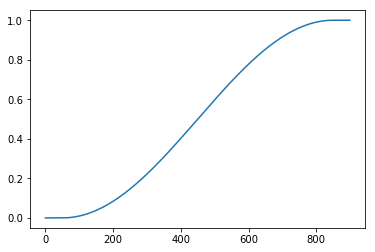

In [87]:
pos = [posfunc(t)  for t in range(800)]
pos = [pos[0]]*50 + pos + [pos[-1]]*50
f = pandas.DataFrame.from_records(pos, columns=["x", "y", "z"])
#plt.plot(f.x, f.z)
plt.plot(f.x)


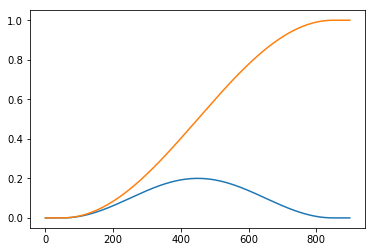

In [88]:
plt.plot(f.z)
plt.plot(f.x)

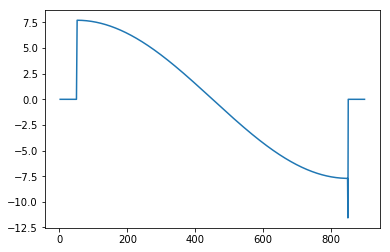

In [89]:
velx = f.x.diff()*1000
velz = f.z.diff()*1000
#plt.plot(velz)
accx = velx.diff()*1000
accz = velz.diff()*1000
plt.plot(accx)

In [90]:
saccz = accz.iloc[2::20]
saccz.head()


2     0.000000
22    0.000000
42    0.000000
62    6.145465
82    5.986541
Name: z, dtype: float64

0.00987168483813
0.00493599465689
4.127502784e-14
-0.0049359946559
-0.00987168483934
-0.0148067660846
-0.0181988162239
-0.00154211776098
0.0197409339854
0.0148067660843
0.00987168483813
0.00493599465689
4.127502784e-14
-0.0049359946559
-0.00987168483934
-0.0148067660846
-0.0181988162239
-0.00154211776098
0.0197409339854
0.0148067660843


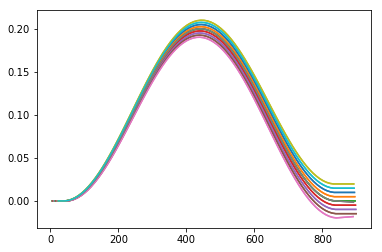

In [96]:
for i in range(4, 24):
    saccz = accz.iloc[i::10]
    svelz = saccz.cumsum()*0.01
    sposz = svelz.cumsum()*0.01
    plt.plot(sposz)
    print(sposz.iloc[-1])


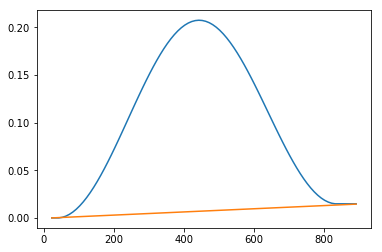

In [106]:
#endz = sposz.iloc[-1]
plt.plot(sposz)
cz = sposz.copy()
for i in range(len(cz)):
    cz.iloc[i] = endz*i/(len(cz)+1)
plt.plot(cz)

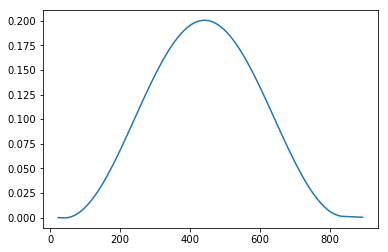

In [107]:
plt.plot(sposz - cz)